<img align=left src='keras.png' width='400'/>

# Zalando dataset: Fashion-Mnist

Przyklad oparty na bazie danych Fashion-MNIST czyli zdjęciach z Zalando (60,000 w bazie treningowej i 10,000 testowych).  
Każde zdjęcie to czarno-biały obrazek o rozdzielczości 28x28 oraz numer jednej z 10 klas: 

<img align='left' src='fashion-mnist.png' width='500' />

### Katergorie w zestawie
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

# Importujemy niezbędne moduły

In [1]:
import numpy as np

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Ładujemy dane: fashion-MNIST

In [2]:
# wgrywamy dane i dzielimy ja na training i test set
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

train_X.shape

(60000, 28, 28)

In [3]:
# katergorie produktów w bazie 
kategorie = {0:'T-shirt/top', 1: 'Trousers', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
             5: 'Sandals', 6:'Shirt', 7:'Sneacker', 8:'Bag', 9:'Ankle boot'}

def kategoria(numer):
    return kategorie[numer]  

Coat


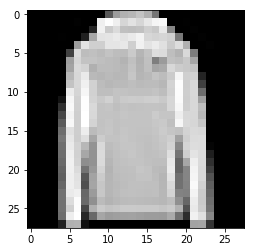

In [4]:
plt.imshow(train_X[24], cmap='gray')
print(kategoria(train_Y[24]))

## zmieniamy kształt danych

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

# zmieniamy dane pixeli na liczby zmiennoprzecinkowe
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# skalujemy wartosci pixeli do zakresu od 0 do 1
train_X = train_X / 255.
test_X = test_X / 255.

print('train_X shape:', train_X.shape)
print(test_X.shape[0], 'test samples')

train_X shape: (60000, 28, 28, 1)
10000 test samples


## Zmieniamy odpowiedzi do: one-hot format

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [6]:
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# ustalamy ilosc klas
num_classes = 10 # ilość klas

In [7]:
for i in (0,1,3):
    print(f'kategoria: {train_Y[i]}, one-hot encoding: {train_Y_one_hot[i]}')
    

kategoria: 9, one-hot encoding: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
kategoria: 0, one-hot encoding: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
kategoria: 3, one-hot encoding: [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


##  Dzielimy dane na treningowe i walidacyjne

In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2)

# Definiujemy model sieci

In [12]:
fashion_model = Sequential()

# Kernel (filtr) o rozmiarze (3, 3) Funkcja aktywacyjna, w tym wypadku LeakyReLU
fashion_model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))
fashion_model.add(MaxPooling2D(2, 2))

fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
fashion_model.add(MaxPooling2D(2, 2))

fashion_model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))                  
fashion_model.add(MaxPooling2D(2, 2))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
                  
fashion_model.add(Dense(num_classes, activation='softmax'))# Dziękifunkcji  "softmax" odpowiedzi są w zakresie [0-1] i sumują się do 1
                                                   # czyli mogą być traktowane jako prawdopodobieństwo

In [13]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
__________

# Kompilujemy nasz model
Nasz model zbudowany w Pythonie jest  optymalizowany i kompilowany do kodu maszynowego. 

Do skompilowania naszego modelu Keras potrzebuje również **loss function** i **optimizera**. 
Nasz **loss function** to *categorical crossentropy*, która dobrze nadaje sie do porównywania dwóch rozkładów prawdopodobieństwa.

Odpowiedż naszej sieci to prawdopodobieństwo, ze dana cyfra to któraś z 10 cyfr (np. "na 80% ten obrazek to cyfra '3', na 10% to '8', na 5% to '2', itd"), a targetem jest dystrybucja w której prawidlłowa odpowiedż ma 100% prawdopodobieństwa, a wszystkie inne odpowiedzi 0%.Cross-entropy jest miarą różnicy pomiędzy naszą dystrybucją prawdopodobieństwa, a prawidłową  
[Szczegóły na Wikipedii](https://en.wikipedia.org/wiki/Cross_entropy)

Optimizer decyduje, jak szybko model się uczy i zapobiega jego zatrzymaniu.  
Korzystamy z ['adama'](http://ruder.io/optimizing-gradient-descent/index.html#adam)

In [14]:
fashion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trenujemy naszą sieć!

## Parametru naszego modelu

In [15]:
batch_size = 64 # 128 obrazki w jednym mini-batchu, średnia błędów z batcha jest podstawą do zmiany wag w sieci

epochs = 10 # ilość epok (ile razy trenujemy sieć używając  naszego zestawu danych)

## Trening

In [16]:
fashion_train = fashion_model.fit(train_X, train_label, 
                                  batch_size=batch_size,
                                  epochs=10,
                                  verbose=1,
                                  validation_data=(valid_X, valid_label))



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 121s 3ms/step - loss: 0.5108 - acc: 0.8122 - val_loss: 0.3725 - val_acc: 0.8686
Epoch 2/10
48000/48000 [==============================] - 113s 2ms/step - loss: 0.3078 - acc: 0.8875 - val_loss: 0.2985 - val_acc: 0.8892
Epoch 3/10
48000/48000 [==============================] - 126s 3ms/step - loss: 0.2624 - acc: 0.9055 - val_loss: 0.2721 - val_acc: 0.8994
Epoch 4/10
48000/48000 [==============================] - 134s 3ms/step - loss: 0.2302 - acc: 0.9145 - val_loss: 0.2833 - val_acc: 0.8965
Epoch 5/10
48000/48000 [==============================] - 119s 2ms/step - loss: 0.2034 - acc: 0.9254 - val_loss: 0.2475 - val_acc: 0.9108
Epoch 6/10
48000/48000 [==============================] - 137s 3ms/step - loss: 0.1814 - acc: 0.9335 - val_loss: 0.2489 - val_acc: 0.9109
Epoch 7/10
48000/48000 [==============================] - 131s 3ms/step - loss: 0.1640 - acc: 0.9393 - val_loss: 0.2530 - 

## Zapisujemy naszą wytrenowaną sieć

In [17]:
fashion_model.save('fashion_mnist_cnn.h5')

# Sprawdzamy, czy nasza sieć działa

In [18]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 9s 911us/step


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.272498698959
Test accuracy: 0.9153


In [19]:
from keras.preprocessing import image
def prepare_img(picture_path):
    img = image.load_img(path=picture_path,grayscale=True,target_size=(28,28))
    img = 255 - image.img_to_array(img)
    test_img = img.reshape((1,28,28,1))
    return test_img

In [20]:
trampek = prepare_img('trampek.jpg')
shirt_img = prepare_img('shirt2.jpg')

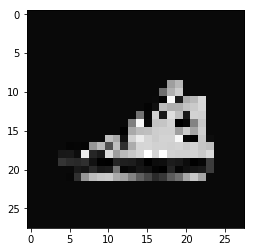

In [28]:
plt.imshow(trampek.reshape(28, 28), cmap='gray')

In [29]:
fashion_model.predict(trampek)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]], dtype=float32)

In [31]:
odp = fashion_model.predict(trampek)
kategoria(np.argmax(odp))

'Sneacker'

# Backup

TypeError: Invalid dimensions for image data

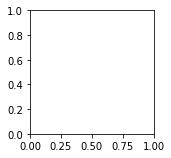

In [24]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(221)
plt.imshow(train_X[0], cmap='gray')
plt.title(kategoria(train_Y[0]))

# Display the first image in testing data
plt.subplot(222)
plt.imshow(test_X[0], cmap='gray')
plt.title(kategoria(test_Y[0]))

# Display the first image in testing data
plt.subplot(223)
plt.imshow(train_X[1], cmap='gray')
plt.title(kategoria(train_Y[1]))

# Display the first image in testing data
plt.subplot(224)
plt.imshow(test_X[3], cmap='gray')
plt.title(kategoria(test_Y[3]))